In [137]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.optimize import root,bisect
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display, Math, Latex
from scipy import sparse

In [2]:
sns.set_style('white')

## Яма с бесконечными стенками
Потенциал задается $$E_{nl} = \frac{\hbar^2}{2ma^2}\beta_{nl}^2,$$
где $\beta_{nl}$ -  $n$-тый ноль $l$-той сферической функций Бесселя $j_n(x) = (-x)^n\bigg(\frac{1}{x} \frac{d}{dx}\bigg)^n \frac{\sin{x}}{x}$

Нули известны:

| |n=1|n=2|n=3|n=4|
| :-- | :--: | :--: | :---: | :--:
|l=0|3.142|6.283|9.425|12.566|
|l=1|4.493 | 7.725 | 10.904| 14.066
|l=2|5.763 | 9.095 | 12.323 | 15.515
|l=3|6.988 | 10.417 | 13.698 | 16.924
|l=4|8.183 | 11.705 | 15.040 | 18.301

Перейдем в атомарные едеиницы: $\hbar = 1, m = 1, a = 5~ a. u.$

Найдем численные решения для различных значений $l$ и $n$.

In [3]:
#создаем массив из нулей сферич. функций Бесселя
n = 5
A = [] 
for i in range(n): 
    A.append(list(map(float, input().split())))

3.142	6.283	9.425	12.566
4.493	7.725	10.904	14.066
5.763	9.095	12.323	15.515
6.988	10.417	13.698	16.924
8.183	11.705	15.040	18.301


In [5]:
Arr =  np.asarray(A)

In [8]:
a=5
E = Arr**2 / (2.0*a**2)
#print (E)
df = pd.DataFrame(E)
df.columns = [r"$n=1$",r"$n=2$",r"$n=3$",r"$n=4$"]

#print (df.to_latex())

In [9]:
#соответствующие значения энергии
df

,$n=1$,$n=2$,$n=3$,$n=4$
0,0.197443,0.789522,1.776613,3.158087
1,0.403741,1.193512,2.377944,3.957047
2,0.664243,1.654381,3.037127,4.814305
3,0.976643,2.170278,3.752704,5.728436
4,1.339230,2.740140,4.524032,6.698532


## Яма с конечными стенками


В случае $l=0$ для вычисления спектра имеет место следующая формула:
$$\tan \bigg(\frac{\sqrt{2mV_0}}{\hbar}a\sqrt{1-\frac{|E|}{V_0}}\bigg)=-\sqrt{\frac{V_0}{|E|} -1}$$
Перенесем все в одну часть, и положим $a=5, m=1, \hbar=1, V_0 =10$

In [9]:
V_0=10.0
a=5.0
def f(x):
    return np.tan(a*np.sqrt(2)*np.sqrt(V_0 - x))+np.sqrt(V_0/x-1)

(-20, 20)

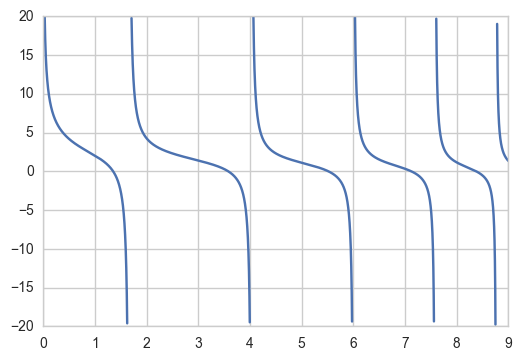

In [10]:
xx = np.linspace(0,9,10000)
yy = f(xx)
yy[yy>20] = np.inf
yy[yy<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy)
#plt.plot(ens[ens<=4],np.zeros_like(ens[ens<=4]),'o')
plt.grid(True)
plt.ylim([-20,20])

In [5]:
def f1(x):
    return np.tan(a*np.sqrt(2)*np.sqrt(V_0 - x))

def f2(x):
    return -np.sqrt(V_0/x-1)

In [6]:
print(plt.style.available)

['ggplot', 'dark_background', 'seaborn-notebook', 'seaborn-white', 'bmh', 'classic', 'seaborn-dark-palette', 'seaborn-whitegrid', 'seaborn-colorblind', 'seaborn-paper', 'seaborn-muted', 'seaborn-bright', 'grayscale', 'seaborn-poster', 'seaborn-deep', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-dark', 'seaborn-pastel', 'fivethirtyeight', 'seaborn-talk']


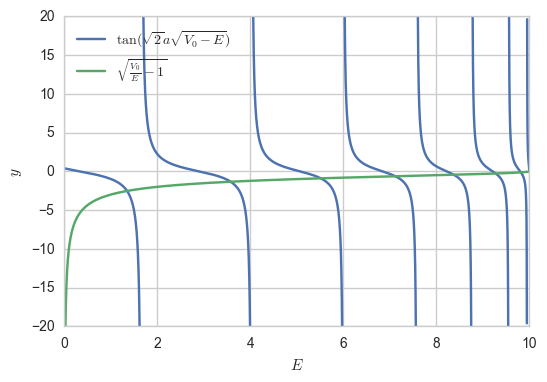

In [54]:
xx = np.linspace(0,10.0,100000)
yy1 = f1(xx)
yy2 = f2(xx)
yy1[yy1>20] = np.inf
yy1[yy1<-20] = np.inf
yy2[yy2>20] = np.inf
yy2[yy2<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy1,label=r'$\tan(\sqrt{2} a \sqrt{V_0-E})$')
plt.plot(xx,yy2,label=r'$\sqrt{\frac{V_0}{E}-1}$')
#plt.plot(ens[ens<=10.0],f1(ens[ens<=10.0]),'o')
plt.legend(loc='best')
plt.ylim([-20,20])
#plt.grid(True)
plt.xlabel(r'$E$')
plt.ylabel(r'$y$')
plt.savefig('tan-sqrt.pdf')

In [55]:
print (root(f,1.0).x)

[ 1.3500333]


In [12]:
x0 = np.arange(0.01,V_0,step=0.1)

In [13]:
ens = []
for step in x0:
    ens.append(root(f,step).x[0])

In [14]:
ens = (np.asarray((list((set(ens))))))

In [15]:
ens.sort()
print (ens)

[ 1.3500333   1.3500333   1.3500333   1.3500333   1.3500333   1.3500333
  1.3500333   1.3500333   1.3500333   1.3500333   1.3500333   1.3500333
  1.3500333   1.3500333   3.57753041  3.57753041  3.57753041  3.57753041
  3.57753041  3.57753041  3.57753041  3.57753041  3.57753041  3.57753041
  3.57753041  3.57753041  3.57753041  3.57753041  5.5154647   5.5154647
  5.5154647   5.5154647   5.5154647   5.5154647   5.5154647   5.5154647
  5.5154647   5.5154647   7.12004505  7.12004505  7.12004505  7.12004505
  7.12004505  7.12004505  7.12004505  8.37638025  8.37638025  8.37638025
  8.37638025  8.37638025  8.37638025  8.37638025  9.27735356  9.27735356
  9.27735356  9.27735356  9.27735356  9.81919275  9.81919275  9.81919275
  9.81919275]


In [16]:
counter = 0
while(counter < 10):
    ind = []
    for i in range(1,ens.shape[0]):        
        if (np.abs(ens[i]-ens[i-1]) < 1e-5):
            ind.append(i)
    print (ind)
    ens = np.delete(ens,np.asarray(ind))
    counter+=1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 59, 60]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [17]:
print (ens)

[ 1.3500333   3.57753041  5.5154647   7.12004505  8.37638025  9.27735356
  9.81919275]


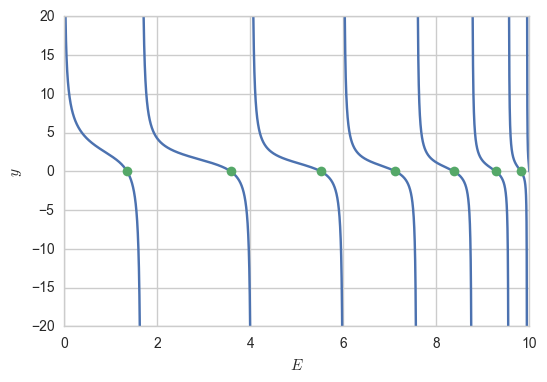

In [18]:
xx = np.linspace(0,10.0,1000000)
yy = f(xx)
yy[yy>20] = np.inf
yy[yy<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy)
plt.plot(ens[ens<=10.0],np.zeros_like(ens[ens<=10.0]),'o')
plt.grid(True)
plt.ylim([-20,20])
plt.xlabel(r'$E$')
plt.ylabel(r'$y$')
plt.savefig('finite_well.pdf')

In [19]:
from numpy import vectorize

In [20]:
def potential(x):
    if (np.abs(x)<a):
        return -V_0
    else:
        return 0
    
potential = vectorize(potential)

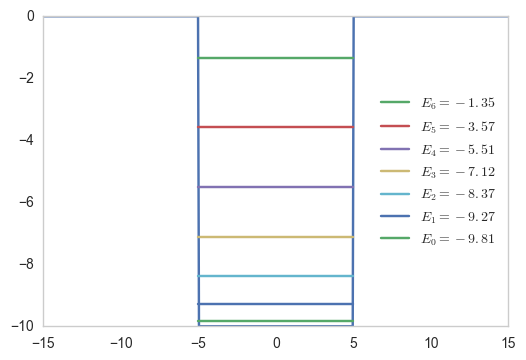

In [66]:
x = np.linspace(-15,15,500)
xs = np.linspace(-5,5,500)
y = potential(x)
plt.plot(x,y)
for i in range(ens.shape[0]):
    plt.plot(xs,-np.ones_like(xs)*ens[i],label=r"$E_"+str(6-i)+"="+str(-ens[i])[:5]+"$")
    
plt.legend(loc='right')
plt.grid(False)
plt.savefig('ens_finite.pdf')

In [22]:
def wv_in(k,r):
    return np.sinc(k*r/np.pi) * k

In [23]:
def wv_out(k,r):
    return (-1.0j)*np.exp(-k*r)/r

In [24]:
print (a)

5.0


In [25]:
ksq = 2*(10.0 - ens)
kappasq = 2*(ens)

In [51]:
ind = 3

In [52]:
print (ksq[-ind])
print (kappasq[-ind])

3.24723950121
16.7527604988


In [53]:
B = (wv_in(np.sqrt(ksq[-ind]),a)/wv_out(np.sqrt(kappasq[-ind]),a))

In [54]:
print (B)

(-0+311249248.734j)


In [55]:
N = 200
x = np.linspace(-10,10,N)
h = x[1]-x[0]
xx,yy = np.meshgrid(x,x)
z = np.zeros((N,N),dtype=np.complex128)
rs = np.sqrt(xx**2+yy**2)
for i in range(N):
    for j in range(N):
        if(xx[i,j]**2+yy[i,j]**2 <= a**2):

            z[i,j] = (wv_in(np.sqrt(ksq[-ind]),rs[i,j]))
        else:
            z[i,j] = B*((wv_out(np.sqrt(kappasq[-ind]),rs[i,j])))
            


In [56]:
integr = np.sum(np.abs(z)**2)*h**2

z = np.abs(z)**2/integr

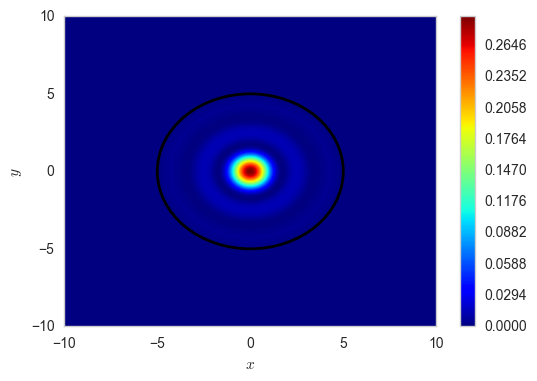

In [57]:
from matplotlib import cm
ax = plt.gca()
circle1 = plt.Circle((0, 0), 5, color='black',fill=False,lw=2)
plt.contourf(xx,yy,z,500,cmap=cm.jet)
ax.add_artist(circle1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(False)
plt.colorbar()
plt.savefig('finite_3.pdf')

In [58]:
from mpl_toolkits.mplot3d import Axes3D

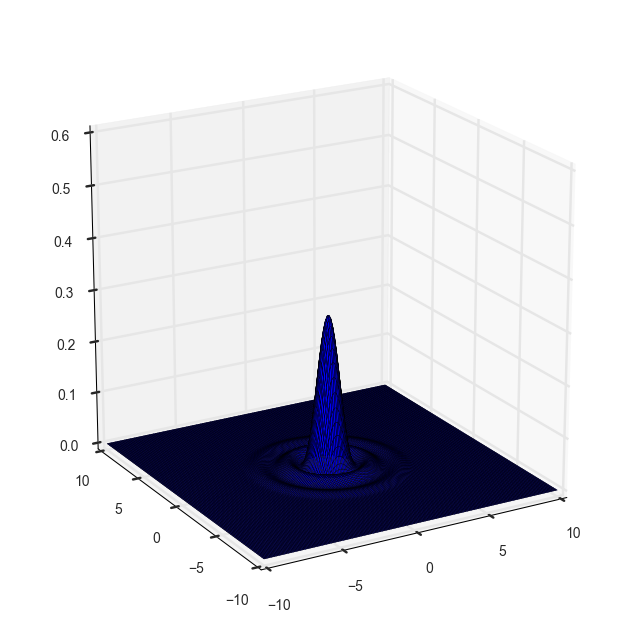

In [60]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.plot_surface(xx, yy, z, rstride = 1, cstride = 1)
ax.view_init(20, -120) 
ax.auto_scale_xyz([-10, 10], [-10, 10], [0, 0.6])
plt.show()

l =1

In [80]:
V_0=10.0
a=5.0
def g(x):
    return np.tan(a*np.sqrt(2)*np.sqrt(V_0 - x)) - (a*np.sqrt(2)*np.sqrt(V_0 - x)*x)/(V_0+a*np.sqrt(2)*V_0*np.sqrt(x)-a*np.sqrt(2)*np.sqrt(x)*x)

(-20, 20)

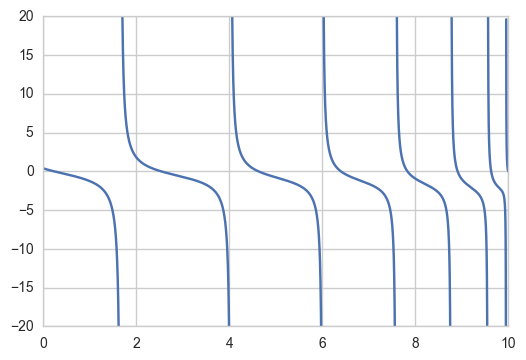

In [81]:
xx = np.linspace(0,10.0,100000)
yy = g(xx)
yy[yy>20] = np.inf
yy[yy<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy)
#plt.plot(ens[ens<=4],np.zeros_like(ens[ens<=4]),'o')
plt.grid(True)
plt.ylim([-20,20])

In [82]:
def g1(x):
    return np.tan(a*np.sqrt(2)*np.sqrt(V_0 - x)) 

def g2(x):
    return (a*np.sqrt(2)*np.sqrt(V_0 - x)*x)/(V_0+a*np.sqrt(2)*V_0*np.sqrt(x)-a*np.sqrt(2)*np.sqrt(x)*x)

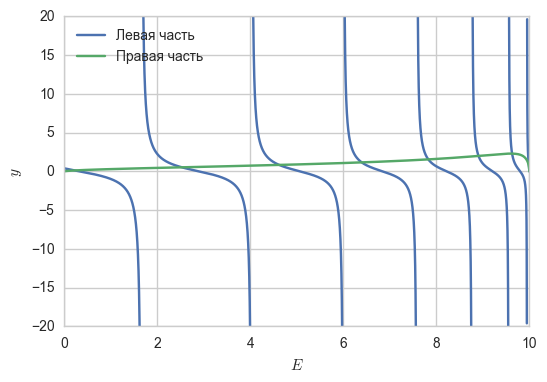

In [83]:
xx = np.linspace(0,10.0,100000)
yy1 = g1(xx)
yy2 = g2(xx)
yy1[yy1>20] = np.inf
yy1[yy1<-20] = np.inf
yy2[yy2>20] = np.inf
yy2[yy2<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy1,label=r'Левая часть')
plt.plot(xx,yy2,label=r'Правая часть')
#plt.plot(ens[ens<=10.0],f1(ens[ens<=10.0]),'o')
plt.legend(loc='best')
plt.ylim([-20,20])
#plt.grid(True)
plt.xlabel(r'$E$')
plt.ylabel(r'$y$')

In [84]:
x0 = np.arange(0.01,V_0,step=0.1)
ens = []
for step in x0:
    ens.append(root(g,step).x[0])
ens = (np.asarray((list((set(ens))))))
ens.sort()
print (ens)

[ 0.22555551  0.22555551  0.22555551  0.22555551  0.22555551  0.22555551
  0.22555551  0.22555551  0.22555551  0.22555551  0.22555551  0.22555551
  0.22555551  0.22555551  0.22555551  2.5278776   2.5278776   2.5278776
  2.5278776   2.5278776   2.5278776   2.5278776   2.5278776   2.5278776
  2.5278776   2.5278776   2.5278776   2.5278776   4.62187741  4.62187741
  4.62187741  4.62187741  4.62187741  4.62187741  4.62187741  4.62187741
  4.62187741  4.62187741  4.62187741  4.62187741  6.39653289  6.39653289
  6.39653289  6.39653289  6.39653289  6.39653289  6.39653289  6.39653289
  6.39653289  7.82858619  7.82858619  7.82858619  7.82858619  7.82858619
  7.82858619  7.82858619  7.82858619  7.82858619  8.9081386   8.9081386
  8.9081386   8.9081386   8.9081386   8.9081386   8.9081386   9.63019612
  9.63019612  9.63019612 10.        ]


In [85]:
counter = 0
while(counter < 10):
    ind = []
    for i in range(1,ens.shape[0]):        
        if (np.abs(ens[i]-ens[i-1]) < 1e-5):
            ind.append(i)
    print (ind)
    ens = np.delete(ens,np.asarray(ind))
    counter+=1


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 66, 67]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [86]:
print (ens)

[ 0.22555551  2.5278776   4.62187741  6.39653289  7.82858619  8.9081386
  9.63019612 10.        ]


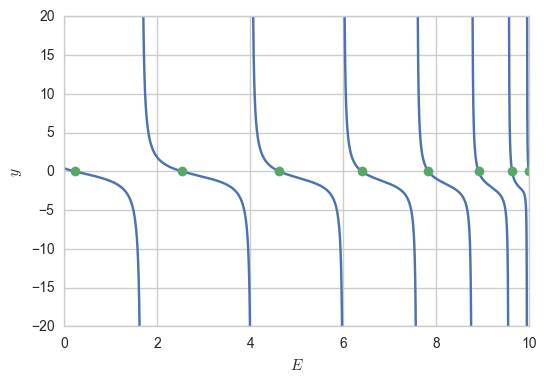

In [87]:
xx = np.linspace(0,10.0,1000000)
yy = g(xx)
yy[yy>20] = np.inf
yy[yy<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy)
plt.plot(ens[ens<=10.0],np.zeros_like(ens[ens<=10.0]),'o')
plt.grid(True)
plt.ylim([-20,20])
plt.xlabel(r'$E$')
plt.ylabel(r'$y$')

l=3

In [91]:
def f1(x):
    return np.tan(a*np.sqrt(2)*np.sqrt(V_0 - x))


In [117]:
def f2(x):
    return a*np.sqrt(2)*np.sqrt(V_0-x)*(1+a*np.sqrt(2)*np.sqrt(V_0 - x)+(2/3)*V_0*a**2(np.float(x/V_0)-np.float(x**2/V_0**2)))/(1+a*np.sqrt(2)*np.sqrt(x)*(1-(2/3)*V_0*a**2(x/V_0-x**2/V_0**2)))

In [120]:
def h(x):
    return np.tan(a*np.sqrt(2)*np.sqrt(V_0 - x))-a*np.sqrt(2)*np.sqrt(V_0-x)*(1+a*np.sqrt(2)*np.sqrt(V_0 - x)+0.6666666666666666*V_0*a**2(np.float(x/V_0)-np.float(x**2/V_0**2)))/(1+a*np.sqrt(2)*np.sqrt(x)*(1-0.6666666666666666*V_0*a**2(np.float(x/V_0)-np.float(x**2/V_0**2))))

xx = np.linspace(0,9.0,100000)
yy = h(xx)
yy[yy>20] = np.inf
yy[yy<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy)
#plt.plot(ens[ens<=4],np.zeros_like(ens[ens<=4]),'o')
plt.grid(True)
plt.ylim([-20,20])

In [111]:
2/3

0.6666666666666666

xx = np.linspace(0,10.0,100000)
yy1 = f1(xx)
yy2 = f2(xx)
yy1[yy1>20] = np.inf
yy1[yy1<-20] = np.inf
yy2[yy2>20] = np.inf
yy2[yy2<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy1,label=r'Левая часть')
plt.plot(xx,yy2,label=r'Правая часть')
#plt.plot(ens[ens<=10.0],f1(ens[ens<=10.0]),'o')
plt.legend(loc='best')
plt.ylim([-20,20])
#plt.grid(True)
plt.xlabel(r'$E$')
plt.ylabel(r'$y$')

## Изотропный осциллятор

In [163]:
def harmonic_oscillator(r, l):
    a = r
    N = 2000
    L = 20
    x = np.linspace(0, L, num=N+2)[1:-1]
    h = x[1]-x[0]
    lamb = np.sqrt(0.12)
    A = np.diag(-lamb**2 *x**2 - l*(l+1)/x**2)
    D = np.zeros((N, N))
    #построим разностную схему
    for i in range(len(x)):
        for j in range(len(x)):
            if i==0:
                D[0][0] = 2
                D[0][1] = -1
            if i==N-1:
                D[N-1][N-1] = 2
                D[N-1][N-2] = -1
            if i==j and j!=N-1 and i >0:
                D[i][j]=2
                D[i][j-1]=-1
                D[i][j+1]=-1
    D = -1/h**2*D
    sys = D + A
    results =[]
    for i in range(6):
        results.append(np.linalg.eigh(sys)[0][-i-1]/2)
    return results

In [170]:
def check_harmonic_oscillator(r, l):
    n = [0,1,2,3,4,5]
    lamb = np.sqrt(0.12)
    E = []
    for i in n:
        E.append(-lamb*(2*i+l+3/2))
    return E

In [172]:
print(harmonic_oscillator(5, 0))

[-0.51961336913688638, -1.2124261995922541, -1.9052330359071514, -2.5980338780038066, -3.2908287258041757, -3.9836175792302924]
None


In [173]:
print(check_harmonic_oscillator(5,0))

[-0.51961524227066325, -1.2124355652982142, -1.9052558883257651, -2.598076211353316, -3.2908965343808667, -3.9837168574084179]
None


In [174]:
print(harmonic_oscillator(5, 1))

[-0.86602303115327073, -1.558836061439306, -2.2516430976085973, -2.9444441395901793, -3.6372391873029359, -4.3300282406684101]
None


In [175]:
print(check_harmonic_oscillator(5,1))

[-0.8660254037844386, -1.5588457268119895, -2.2516660498395407, -2.9444863728670914, -3.6373066958946425, -4.3301270189221936]
None


In [176]:
print(harmonic_oscillator(5, 2))

[-1.2124336921688004, -1.9052473789297244, -2.5980550715724697, -3.2908567700182307, -3.9836524741897699, -4.6764421840085575]
None


In [177]:
print(check_harmonic_oscillator(5,2))

[-1.2124355652982142, -1.9052558883257651, -2.598076211353316, -3.2908965343808667, -3.9837168574084179, -4.676537180435969]
None


In [148]:
N = 2000
L = 20
x = np.linspace(0, L, num=N+2)[1:-1]
h = x[1]-x[0]
a = 5.0
lamb = np.sqrt(0.12)
l = 0

In [149]:
b = -lamb*a**2 - 1/a**2
b

-8.7002540378443864

In [151]:
A = np.diag(-lamb**2 *x**2 - l*(l+1)/x**2)
A

array([[ -1.19880090e-05,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,  -4.79520360e-05,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,  -1.07892081e-04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -4.78561799e+01,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,  -4.79040959e+01,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,  -4.79520360e+01]])

In [153]:
#построим разностную схему
D = np.zeros((N, N))
for i in range(len(x)):
    for j in range(len(x)):
        if i==0:
            D[0][0] = 2
            D[0][1] = -1
        if i==N-1:
            D[N-1][N-1] = 2
            D[N-1][N-2] = -1
        if i==j and j!=N-1 and i >0:
            D[i][j]=2
            D[i][j-1]=-1
            D[i][j+1]=-1
D = -1/h**2*D


In [154]:
D

array([[-20020.005 ,  10010.0025,     -0.    , ...,     -0.    ,
            -0.    ,     -0.    ],
       [ 10010.0025, -20020.005 ,  10010.0025, ...,     -0.    ,
            -0.    ,     -0.    ],
       [    -0.    ,  10010.0025, -20020.005 , ...,     -0.    ,
            -0.    ,     -0.    ],
       ..., 
       [    -0.    ,     -0.    ,     -0.    , ..., -20020.005 ,
         10010.0025,     -0.    ],
       [    -0.    ,     -0.    ,     -0.    , ...,  10010.0025,
        -20020.005 ,  10010.0025],
       [    -0.    ,     -0.    ,     -0.    , ...,     -0.    ,
         10010.0025, -20020.005 ]])

In [144]:
sys = D + A

In [160]:
np.linalg.eigh(sys)[0][-2]/2

-1.2124261995922541

In [146]:
-lamb * (3.0/2)

-0.51961524227066325

## Кулоновский потенциал

In [268]:
def atom_H2(l):
    N = 15000
    L = 400
    x = np.linspace(0, L, num=N+2)[1:-1]
    h = x[1]-x[0]
    A = np.diag(2/x )
    D = np.zeros((N, N))
    for i in range(len(x)):
        for j in range(len(x)):
            if i==0:
                D[0][0] = 2
                D[0][1] = -1
            if i==N-1:
                D[N-1][N-1] = 2
                D[N-1][N-2] = -1
            if i==j and j!=N-1 and i >0:
                D[i][j]=2
                D[i][j-1]=-1
                D[i][j+1]=-1
    D = -1/h**2*D
    sys = A+D
    eigs = np.linalg.eigvalsh(sys)
    E = []
    for i in range(1, 6):
        E.append(-eigs[-i]/2)
    return E
    

In [255]:
def check_atom_H2(l):
    E = []
    for i in range(1, 6):
        E.append(-1/(2*i**2))
    return E

In [256]:
check_atom_H2(0)

[-0.5, -0.125, -0.05555555555555555, -0.03125, -0.02]

In [269]:
atom_H2(0)

[-0.49991115454347346,
 -0.12499444567817483,
 -0.055554458351241606,
 -0.031249652831794778,
 -0.019999857798786456]

In [232]:
N = 3000
L = 20
x = np.linspace(0, L, num=N+2)[1:-1]
h = x[1]-x[0]
a = 5.0
lamb = np.sqrt(0.12)
l = 0

In [233]:
A = np.diag(2/x - l*(l+1)/x**2)

In [234]:
D = np.zeros((N, N))
for i in range(len(x)):
    for j in range(len(x)):
        if i==0:
            D[0][0] = 2
            D[0][1] = -1
        if i==N-1:
            D[N-1][N-1] = 2
            D[N-1][N-2] = -1
        if i==j and j!=N-1 and i >0:
            D[i][j]=2
            D[i][j-1]=-1
            D[i][j+1]=-1
D = -1/h**2*D

In [235]:
eigs = np.linalg.eigvalsh(sys)

In [236]:
sys = A+D
eigs[-1]/2

0.49999200345231321

In [242]:
eigs[-5]/2

0.011059340182662487

In [222]:
np.linalg.eigh(sys)[0][-3]/2

0.055554135968381081

In [243]:
0.5/5**2

0.02

In [226]:
np.linalg.eigvalsh?

## Потенциал Вуда-Саксона

In [595]:
N = 3000
L = 20
V_0 = 10
x = np.linspace(0, L, num=N+2)[1:-1]
h = x[1]-x[0]
R = 5.0
a = 0.5
lamb = np.sqrt(0.12)
l = 0

In [596]:
def WSPot(r,a,R,V_0):
    return -V_0/(1+np.exp((np.abs(r)-R)/a))

def oscill(r,omega):
    return 0.5 * omega**2 * r**2

In [597]:
A = np.diag(-V_0/(1+np.exp((x-R)/a)) + l*(l+1)/x**2)

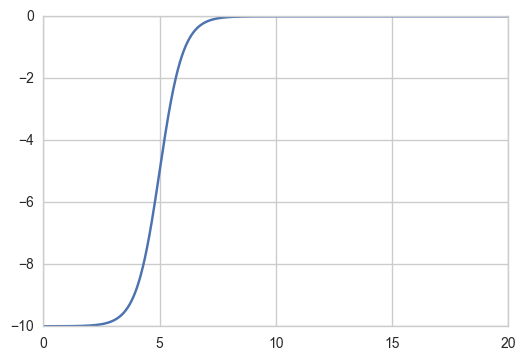

In [598]:
plt.plot(x,-V_0/(1+np.exp((x-R)/a)))

In [599]:
D = np.zeros((N, N))
for i in range(len(x)):
    for j in range(len(x)):
        if i==0:
            D[0][0] = 2
            D[0][1] = -1
        if i==N-1:
            D[N-1][N-1] = 2
            D[N-1][N-2] = -1
        if i==j and j!=N-1 and i >0:
            D[i][j]=2
            D[i][j-1]=-1
            D[i][j+1]=-1
D = -1/h**2*D

In [600]:
sys = -2*A+D

In [601]:
eigs = -np.linalg.eigvalsh(sys)

In [602]:
eigs[-1]/2

-9.6669082012371419

(-10.1, 0.1)

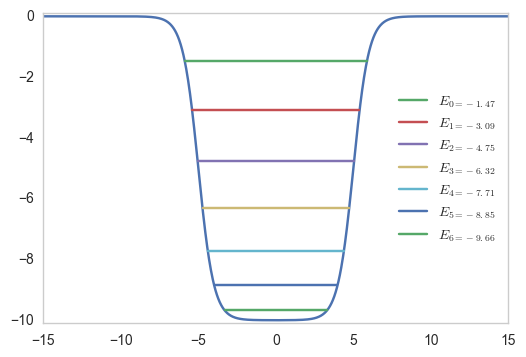

In [603]:
x = np.linspace(-15,15,1000)
xs = np.linspace(-15,15,1000)
y = WSPot(x,a,R,V_0)
plt.plot(x,y)
max_levels = 7
for i in range(max_levels):
    plt.plot(xs[WSPot(xs,a,R,V_0) < eigs[-max_levels+i]/2],np.ones_like(xs[WSPot(xs,a,R,V_0) < eigs[-max_levels+i]/2])*eigs[-max_levels+i]/2,label=r"$E_{"+str(i)+"="+str(eigs[-max_levels+i]/2)[:5]+"}$")
    
plt.legend(loc='right')
plt.grid(False)
plt.ylim([-10.1,0.1])

#plt.savefig('ens_finite.pdf')

In [496]:
eigv = np.linalg.eigh(sys)

In [497]:
x = np.linspace(0, L, num=N+2)[1:-1]

(-0.1, 10)

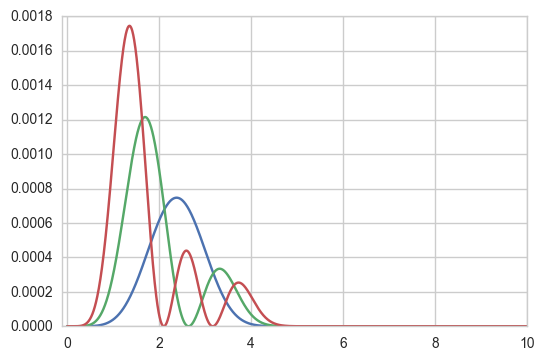

In [502]:
for i in range(3):
    plt.plot(x,(np.abs((eigv[1][:,-1-i])/x)**2))
plt.xlim([-0.1,10])


In [532]:
N = 3000
L = 20
V_0 = 30
x = np.linspace(0, L, num=N+2)[1:-1]
h = x[1]-x[0]
R = 5.0
a = 0.5
lamb = np.sqrt(0.12)
l = 0
omega = 0.1

In [533]:
A = np.diag(oscill(x,omega) + l*(l+1)/x**2)

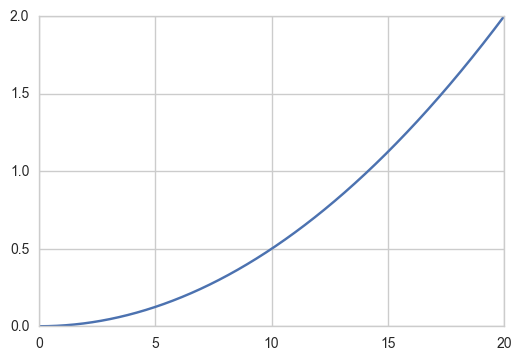

In [534]:
plt.plot(x,oscill(x,omega))

In [535]:
sys = -2*A+D

In [536]:
eigs = -np.linalg.eigvalsh(sys)

(0, 2.5)

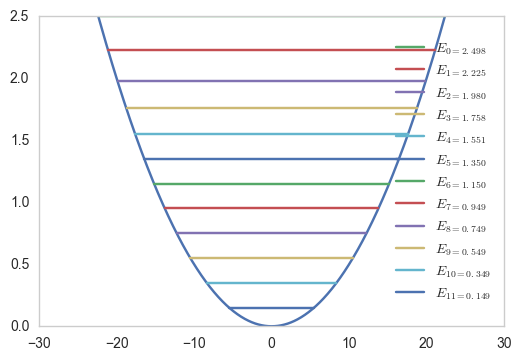

In [539]:
x = np.linspace(-30,30,1000)
xs = np.linspace(-30,30,1000)
y = oscill(x,omega)
plt.plot(x,y)
max_levels = 12
for i in range(max_levels):
    plt.plot(xs[oscill(xs,omega) < eigs[-max_levels+i]/2],np.ones_like(xs[oscill(xs,omega) < eigs[-max_levels+i]/2])*eigs[-max_levels+i]/2,label=r"$E_{"+str(i)+"="+str(eigs[-max_levels+i]/2)[:5]+"}$")
    
plt.legend(loc='right')
plt.grid(False)
plt.ylim([0,2.5])


In [540]:
eigv = np.linalg.eigh(sys)

In [541]:
x = np.linspace(0, L, num=N+2)[1:-1]

(-0.1, 20)

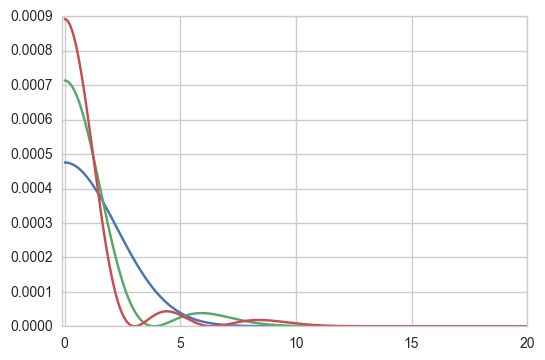

In [543]:
for i in range(3):
    plt.plot(x,(np.abs((eigv[1][:,-1-i])/x)**2))
plt.xlim([-0.1,L])


## Потенциал Хюльтена

In [125]:
N = 8000
L = 10
V_0 = 10
x = np.linspace(0, L, num=N+2)[1:-1]
h = x[1]-x[0]
R = 5.0
a = 0.5
lamb = np.sqrt(0.12)
l = 0

In [126]:
A = np.diag((-V_0*np.exp(-x/a))/(1-np.exp(-x/a)))

In [127]:
#plt.plot(x,-V_0*np.exp(-x/a)/(1-np.exp((-x)/a)))

In [128]:
D = np.zeros((N, N))
for i in range(len(x)):

    if i==0:
        D[0][0] = 2
        D[0][1] = -1
    elif i==N-1:
        D[N-1][N-1] = 2
        D[N-1][N-2] = -1
    else: 
        D[i][i]=2
        D[i][i-1]=-1
        D[i][i+1]=-1
D = -1/h**2*D

In [129]:
sys = -2*A+D
eigs = -np.linalg.eigvalsh(sys)

In [133]:
for i in range(1,3):
    print(eigs[-i]/2)

-7.99988128221
-0.124924678667


In [131]:
def f(V0, a1, n):
    return -V0*((2*a1**2 *V0- n**2)/(2*n*a1*np.sqrt(2*V0)))**2

In [134]:
for i in range(1,3): 
    print(f(V_0,a, i))

-8.0
-0.125


## 

In [329]:
def gen_laplacian(num):
    data1 = [-2]*num
    data2 = [1]*num
    L = sp.sparse.spdiags([ data2, data1, data2 ], [-1, 0, 1], num, num)
    return L.tolil()

In [330]:
def gen_mat(potential,n,L,*args):
    r = np.linspace(0,L,n+2)[1:-1]
    h = r[1]-r[0]
    
    Vvals = potential(r,*args)
    

    D = sp.sparse.diags(Vvals,0)
    
    
    
    mat = 1.0 / h**2 * gen_laplacian(n)-2*D

    return mat

In [352]:
def osc(r,*args):
    return 0.5*(args[0])**2 * r**2

def coulomb(r,*args):
    Z = args[0]
    return -Z/r

def houlten(r,*args):
    V_0 = args[0]
    a = args[1]
    return (-V_0*np.exp(-r/a))/(1-np.exp(-r/a))
    

In [353]:
def compute_engy(potential,n,L,k,*args):
    mat = gen_mat(potential,n,L,*args)
    eigs = sp.sparse.linalg.eigsh(mat,k=k,which='LA',return_eigenvectors=False,tol=1e-8)
    return -eigs/(2.0)

In [354]:
engy = compute_engy(coulomb,4000,40,4,5.0)[::-1]

In [356]:
print (engy)

[-12.49220115  -3.12451212  -1.3887925   -0.7812195 ]


//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(-150.5, 0.0)

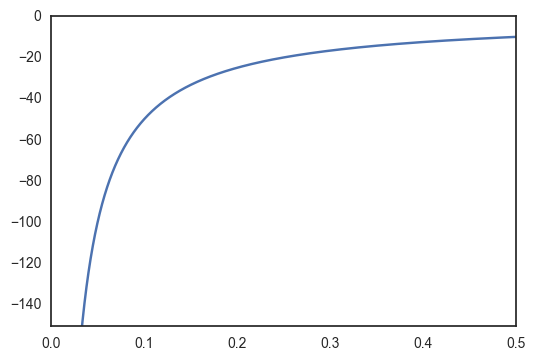

In [362]:
x = np.linspace(0,0.5,10000)
xs = np.linspace(-15,15,1000)
yy = coulomb(np.abs(x),5.0)
yy[yy>20] = np.inf
yy[yy<-200] = np.inf
plt.plot(x,yy)
#max_levels = 12
#for i in range(max_levels):
#    plt.plot(xs[oscill(xs,omega) < eigs[-max_levels+i]/2],np.ones_like(xs[oscill(xs,omega) < eigs[-max_levels+i]/2])*eigs[-max_levels+i]/2,label=r"$E_{"+str(i)+"="+str(eigs[-max_levels+i]/2)[:5]+"}$")
    
plt.legend(loc='right')
plt.grid(False)
plt.ylim([-150.5,0.0])
